In [155]:
import sklearn
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from tensorflow import keras
import tensorflow as tf
import pickle
import os
import joblib

import warnings
warnings.filterwarnings('ignore')

In [156]:
df_train = pd.read_pickle("./train_data.pkl")
df_test = pd.read_pickle("./test_data.pkl")
df_train.head()

,titel,bouwjaar,kilometer_stand,vermogen,prijs,is_handgeschakeld,is_benzine,upload_datum,apk
450,fiat punto twinair,2014,49905,101,6995.0,1,1,11,146
357,fiat punto grande active deurs rijklaarprijs k...,2009,141940,67,4250.0,1,1,11,146
380,fiat punto grande racing auto,2009,135660,95,3940.0,1,1,11,146
145,fiat grande punto dynamic airco automaat prijs,2007,126737,77,3448.0,0,1,6,146
212,fiat grande punto airco nieuw,2006,167873,78,1995.0,1,1,11,1


In [157]:
df_train = df_train.drop('titel', axis=1)
df_test = df_test.drop('titel', axis=1)
df_test

,bouwjaar,kilometer_stand,vermogen,prijs,is_handgeschakeld,is_benzine,upload_datum,apk
259,2009,197261,95,2950.0,1,1,13,146
658,2008,256647,120,2499.0,1,1,11,4
77,2010,171827,84,2999.0,1,0,49,121
65,2010,191860,84,1890.0,1,0,2,75
81,2010,231115,84,2550.0,1,0,20,15
...,...,...,...,...,...,...,...,...
426,2007,192244,120,2450.0,1,1,11,146
136,2006,90038,77,2944.0,1,1,5,146
265,2014,124857,105,6890.0,1,1,11,146
6,2007,209619,67,1999.0,1,1,0,126


In [158]:
X_train = df_train.drop(['prijs'], axis=1)
y_train = df_train[['prijs']]

X_test = df_train.drop(['prijs'], axis=1)
y_test = df_train[['prijs']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tf, X_valid, y_train_tf, y_valid = train_test_split(X_train, y_train)

(0.0, 500.0)

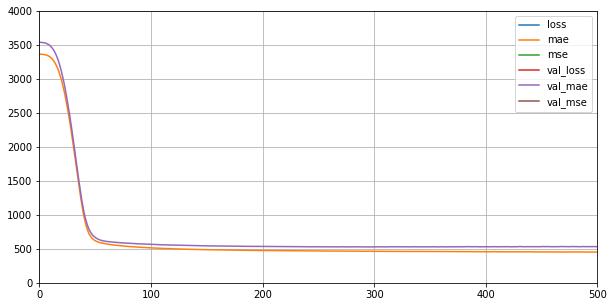

In [159]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(50, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    loss="mean_squared_error", 
    optimizer=optimizer, 
    metrics=['mae', 'mse']
)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

history = model.fit(
    X_train_tf, 
    y_train_tf.values, 
    batch_size=32, 
    epochs=500, 
    validation_data=(X_valid, y_valid.values),
    verbose=0,
    callbacks=[callback]
)

mse_test = model.evaluate(X_test, y_test.values)

pd.DataFrame(history.history).plot(figsize=(10, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 4000) 
plt.gca().set_xlim(0, len(history.history['loss'])) 

In [160]:
model_version = "0001"
model_name = "TFAuto"
model_path = os.path.join(model_name) 
model.save(model_path)
scaler_path = os.path.join(model_name, 'TFScaler.pkl') 
joblib.dump(scaler, scaler_path) 

INFO:tensorflow:Assets written to: TFAuto/assets


['TFAuto/TFScaler.pkl']

In [161]:
X_test[0]

array([ 1.77701408, -1.97772468,  1.58730779,  0.1759198 ,  0.88465174,
        0.03145502, -0.19146816])